In [1]:
# Install required libraries
# !pip install datasets torch torchvision matplotlib -q

# Import libraries
import torch
import torch.nn as nn
from datasets import load_dataset
import matplotlib.pyplot as plt
import random
import numpy as np
from torchvision import transforms

In [3]:
# Load your dataset from the Hugging Face Hub
hf_repo_id = "preetsojitra/skin-lesion-HM10000-binary-classification-4K-subset" 
dataset = load_dataset(hf_repo_id)

data/test-00000-of-00001.parquet:   0%|          | 0.00/420M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/3954 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/1511 [00:00<?, ? examples/s]

In [4]:
dataset

DatasetDict({
    train: Dataset({
        features: ['lesion_id', 'image', 'dx', 'dx_type', 'age', 'sex', 'localization', 'dataset', 'label'],
        num_rows: 3954
    })
    test: Dataset({
        features: ['lesion_id', 'image', 'dx', 'dx_type', 'age', 'sex', 'localization', 'dataset', 'label'],
        num_rows: 1511
    })
})

In [5]:
train_ds = dataset['train']
print(train_ds)

Dataset({
    features: ['lesion_id', 'image', 'dx', 'dx_type', 'age', 'sex', 'localization', 'dataset', 'label'],
    num_rows: 3954
})


In [6]:
train_ds[0]

{'lesion_id': 'HAM_0000871',
 'image': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450>,
 'dx': 'mel',
 'dx_type': 'histo',
 'age': 40.0,
 'sex': 'female',
 'localization': 'chest',
 'dataset': 'vidir_modern',
 'label': 'malignant'}

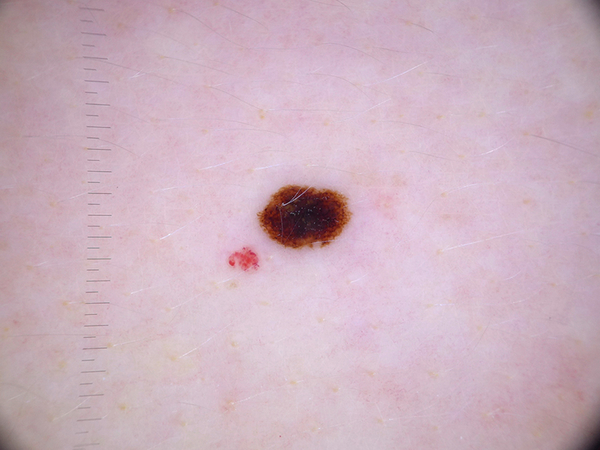

In [12]:
train_ds[0]["image"]

In [14]:
from collections import Counter

In [15]:
# simple analysis
train_labels = [item['label'] for item in train_ds]
train_counts = Counter(train_labels)
print(f"Class distribution in training set: {train_counts}")

Class distribution in training set: Counter({'benign': 2000, 'malignant': 1954})


In [16]:
test_labels = [item['label'] for item in dataset['test']]
test_counts = Counter(test_labels)
print(f"Class distribution in test set: {test_counts}")

Class distribution in test set: Counter({'benign': 1204, 'malignant': 307})


In [17]:
import matplotlib.pyplot as plt

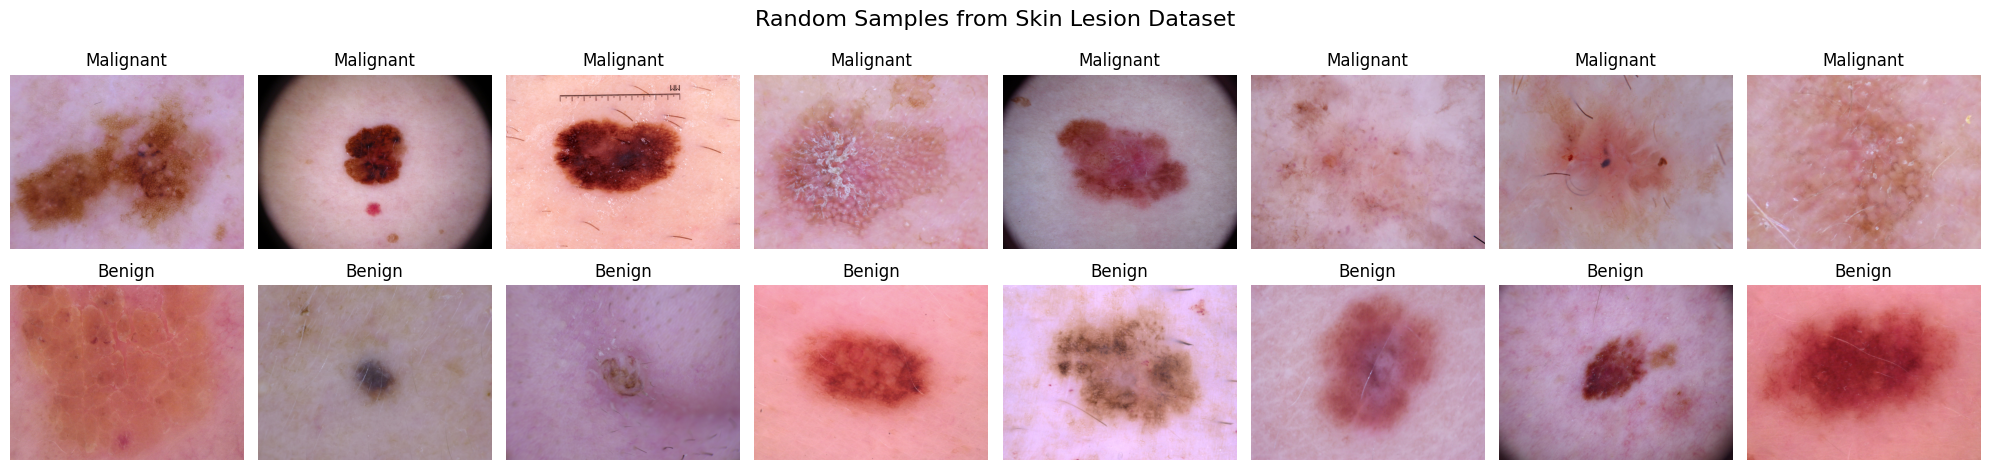

In [18]:
# plotting some random images from the dataset
malignant_samples = [item for item in train_ds if item['label'] == "malignant"]
benign_samples = [item for item in train_ds if item['label'] == "benign"]

n_samples = 8

fig, axes = plt.subplots(2, n_samples, figsize=(20, 5))
for i in range(n_samples):
    sample = random.choice(malignant_samples)
    axes[0, i].imshow(sample['image'])
    axes[0, i].set_title("Malignant")
    axes[0, i].axis('off')
    sample = random.choice(benign_samples)
    axes[1, i].imshow(sample['image'])
    axes[1, i].set_title("Benign")
    axes[1, i].axis('off')
plt.suptitle("Random Samples from Skin Lesion Dataset", fontsize=16)
plt.tight_layout()
plt.show()